In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [4]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


In [5]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [6]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [7]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

11490434/11490434 [==============================] - 1s 0us/step


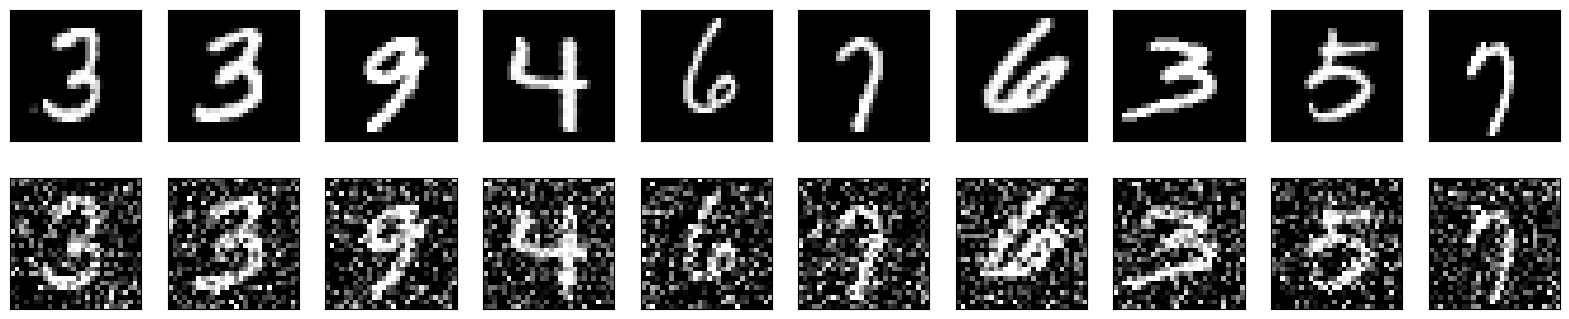

In [8]:
display(train_data, noisy_train_data)

In [9]:
input = layers.Input(shape=(28, 28, 1))

In [10]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

In [11]:
# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [12]:
autoencoder = Model(input,x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [13]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 17s 10ms/step - loss: 0.1316 - val_loss: 0.0728
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0713 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0680 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0661 - val_loss: 0.0654
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.0648
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0651 - val_loss: 0.06

313/313 [==============================] - 1s 2ms/step


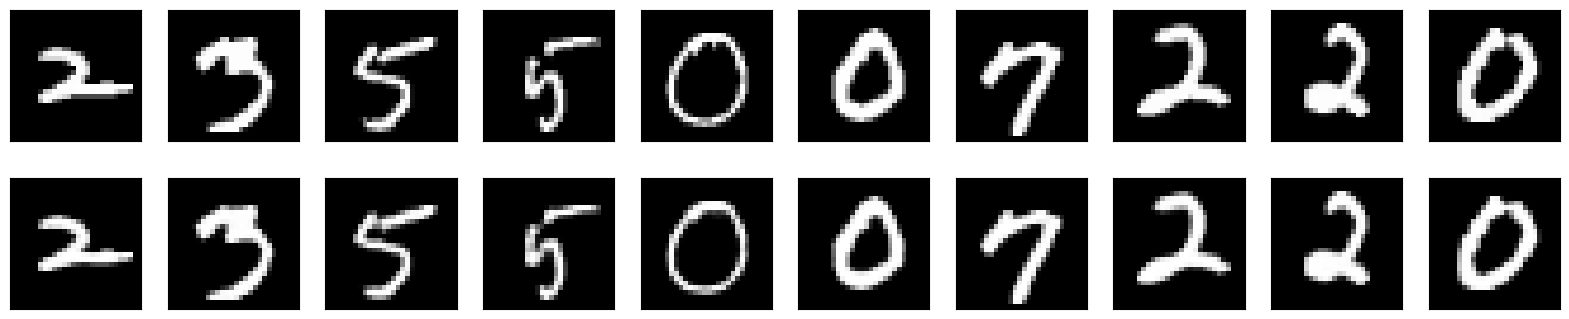

In [14]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

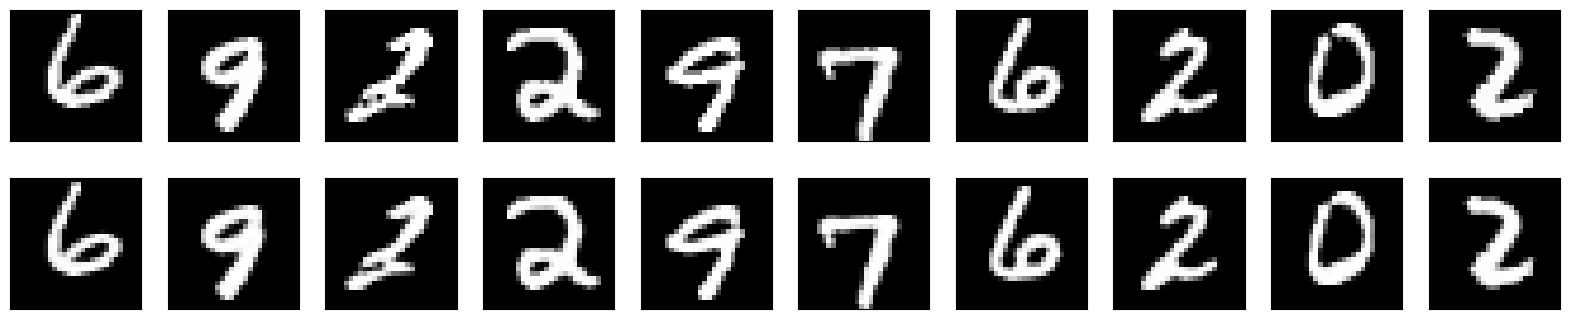

In [15]:
display(test_data, predictions)

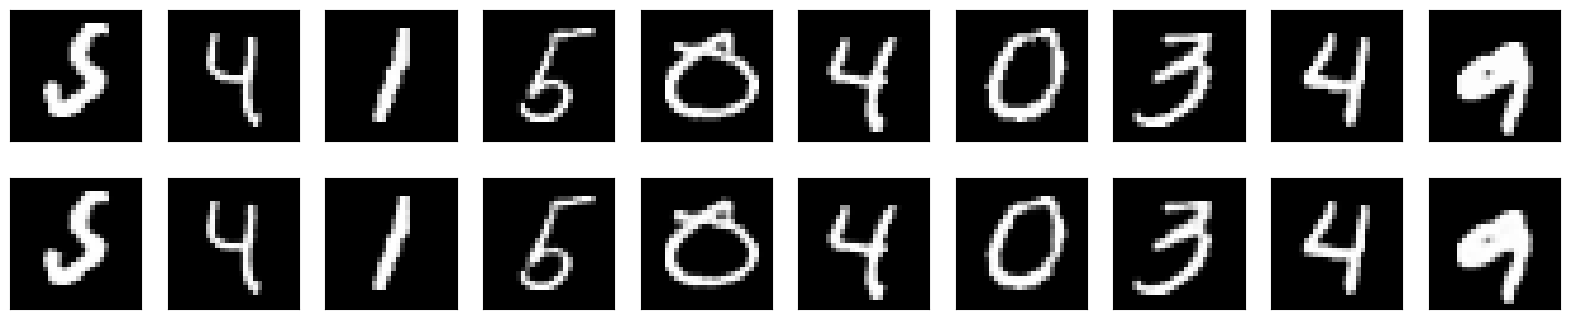

In [16]:
display(test_data, predictions)

In [17]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1015 - val_loss: 0.0939
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0933 - val_loss: 0.0915
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0915 - val_loss: 0.0902
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - val_loss: 0.0894
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - val_loss: 0.0882
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0887 - val_loss: 0.0879
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - val_loss: 0.0874
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0877 - val_lo

313/313 [==============================] - 1s 2ms/step


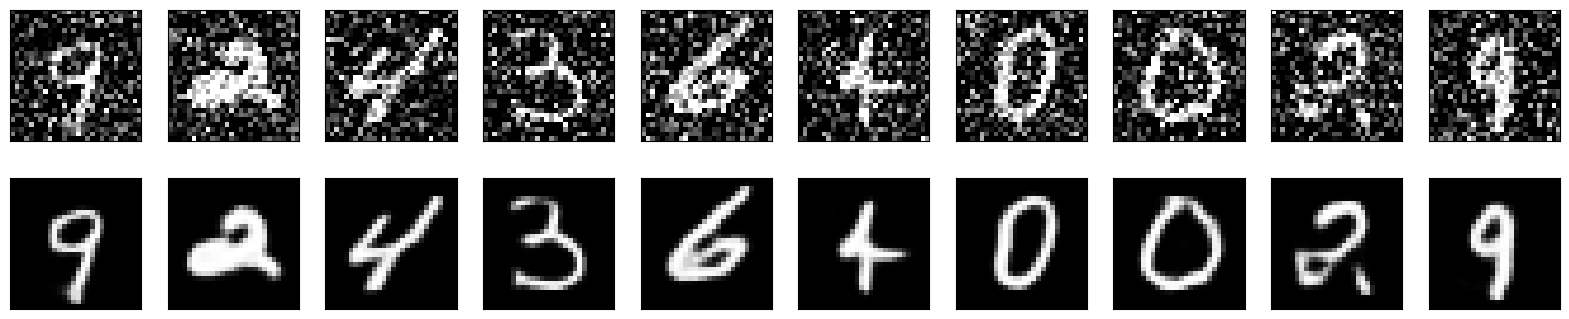

In [19]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

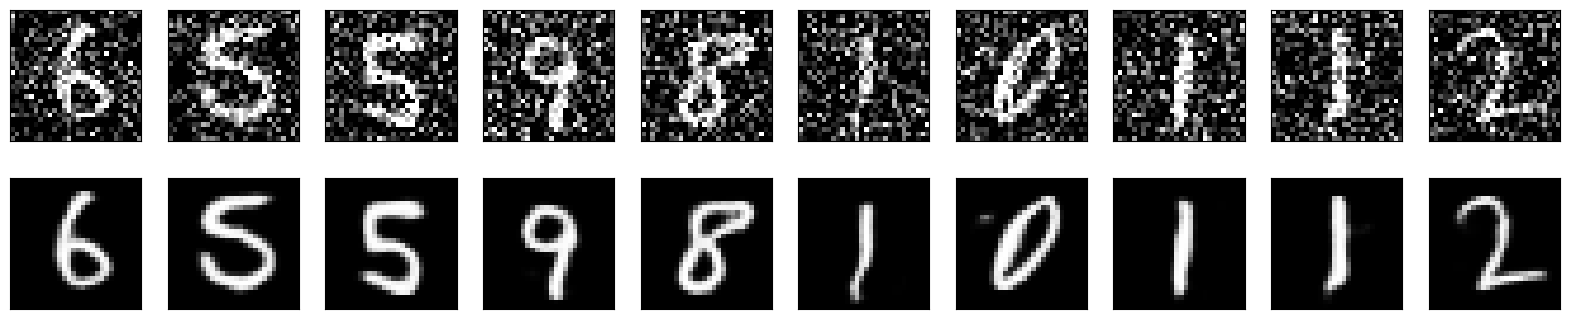

In [20]:
display(noisy_test_data, predictions)

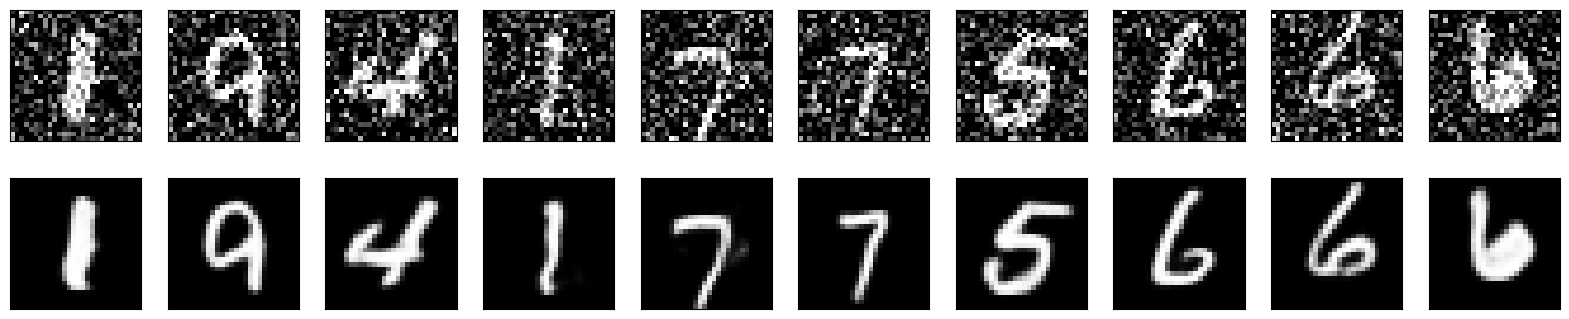

In [23]:
display(noisy_test_data, predictions)

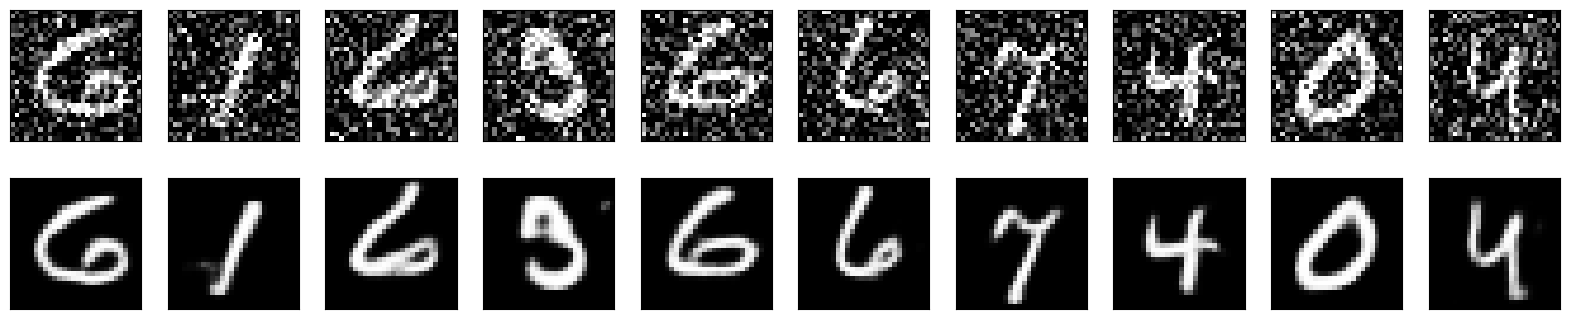

In [24]:
display(noisy_test_data, predictions)

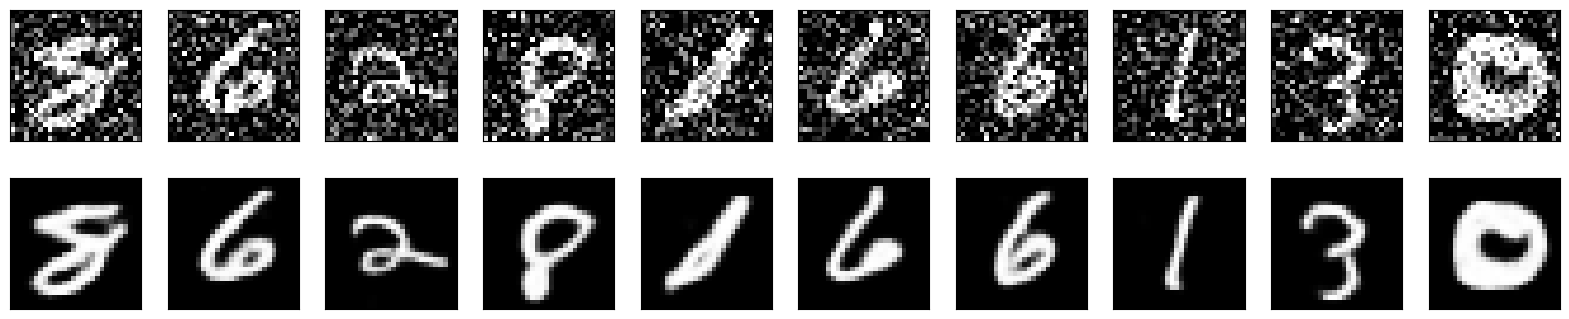

In [25]:
display(noisy_test_data, predictions)

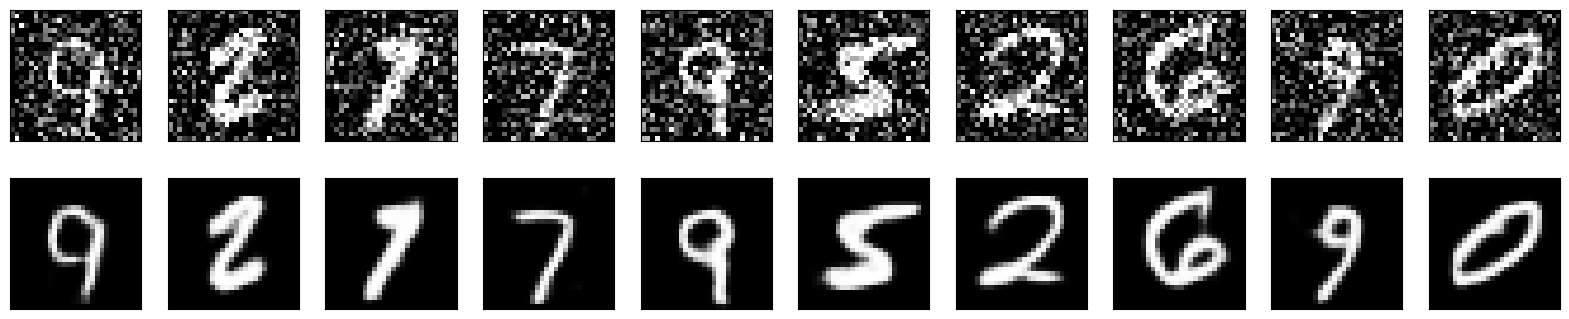

In [26]:
display(noisy_test_data, predictions)